# Back Propagation Regression

![backpropagation-regression](../Img/backpropagation-regression.png)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]], columns=['cgpa', 'profile_score', 'lpa'])
df

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


In [3]:
def initialize_parameters(layer_dims):
  
  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)         

  for l in range(1, L):

    parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
      

  return parameters

In [4]:
initialize_parameters([2,2,1])

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

In [5]:
def linear_forward(A_prev, W, b):
  
  Z = np.dot(W.T, A_prev) + b
  
  return Z

In [6]:
# Forward Prop
def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network
  
  for l in range(1, L+1):
    A_prev = A 
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    #print("A"+str(l-1)+": ", A_prev)
    #print("W"+str(l)+": ", Wl)
    #print("b"+str(l)+": ", bl)
    #print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    #print("A"+str(l)+": ", A)
    #print("**"*20)
          
  return A,A_prev

In [7]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X, parameters)

In [8]:
y_hat = y_hat[0][0]
y_hat

0.32000000000000006

In [9]:
#our loss fuction MSE
y-y_hat**2

3.8975999999999997

In [10]:
A1

array([[1.6],
       [1.6]])

In [11]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0])

In [12]:
update_parameters(parameters,y,y_hat,A1,X)

In [13]:
parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

### Using Keras

In [14]:
df

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


In [15]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

2024-04-02 03:34:31.636459: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 03:34:31.639864: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 03:34:31.683118: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-02 03:34:32.589035: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [16]:
model = Sequential()
model.add(Dense(2,activation='linear',input_dim=2))
model.add(Dense(1,activation='linear'))

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.get_weights()

[array([[-0.514383  , -0.6875005 ],
        [ 0.93679225, -0.2835009 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.26251757],
        [-0.38907576]], dtype=float32),
 array([0.], dtype=float32)]

In [19]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error',optimizer=optimizer)

In [20]:
history = model.fit(df.iloc[:,0:-1].values,df['lpa'].values,epochs=75,verbose=1,batch_size=1)

Epoch 1/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.2588  
Epoch 2/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.3468
Epoch 3/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.3737 
Epoch 4/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.1378 
Epoch 5/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.3121 
Epoch 6/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.1847 
Epoch 7/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.7247
Epoch 8/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.2969 
Epoch 9/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.6113
Epoch 10/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.5706
Epoch 11/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.0864 
Epoch 12/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.0693 
Epoch 13/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.4364 
Epoch 14/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.5729
Epoch 15/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5269 
Epoch 16/75
4/4 ━━━━━━━━

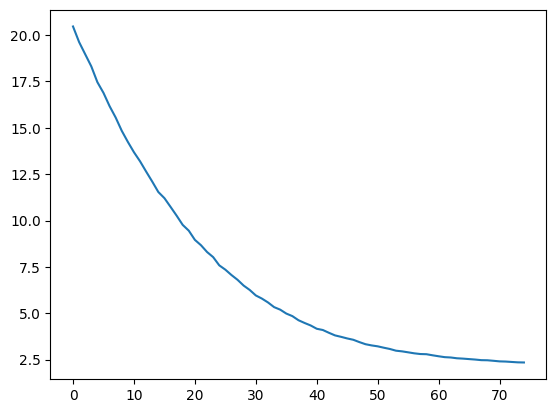

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
